In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing  blanks  with 0  as tenure is 0 and no total charges are recorded

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0") 
df["TotalCharges"] = df["TotalCharges"].astype("float") 

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

In [31]:
def conv(value): 
 if value == 1:
  return "yes"
 else:
  return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [47]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#coverted 0 and 1  value of senoir citizen to ye/no to make it eaiser to understand

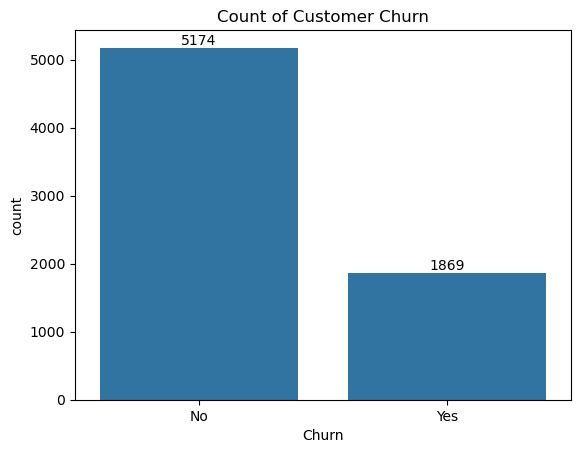

<Figure size 300x300 with 0 Axes>

In [32]:
ax = sns.countplot(x = 'Churn', data = df)
plt.title("Count of Customer Churn")
ax.bar_label(ax.containers[0])
plt.figure(figsize = (3,3))
plt.show()

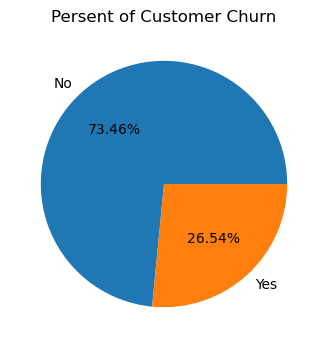

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
plt.title("Persent of Customer Churn", fontsize = 12)
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.figure(figsize = (4,4))
plt.show()

#From the given  pie chart we can conclude that 26.54% customers are churn out.
#now Lat'& explore reason behind it!

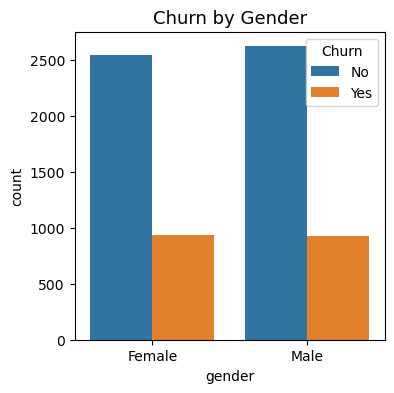

In [29]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = 'Churn')
plt.title("Churn by Gender", fontsize = 13)
plt.show()

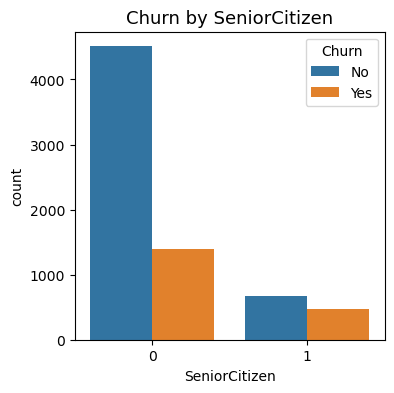

In [28]:
plt.figure(figsize = (4,4))
sns.countplot(x = "SeniorCitizen", data = df, hue = 'Churn')
plt.title("Churn by SeniorCitizen", fontsize = 13)
plt.show()

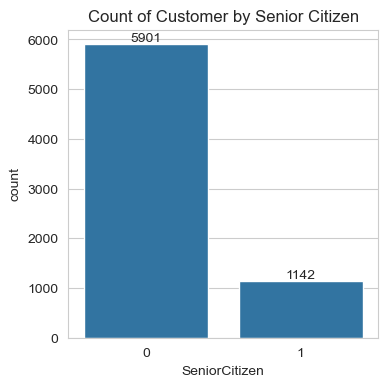

In [45]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Senior Citizen", fontsize = 12)
plt.show()

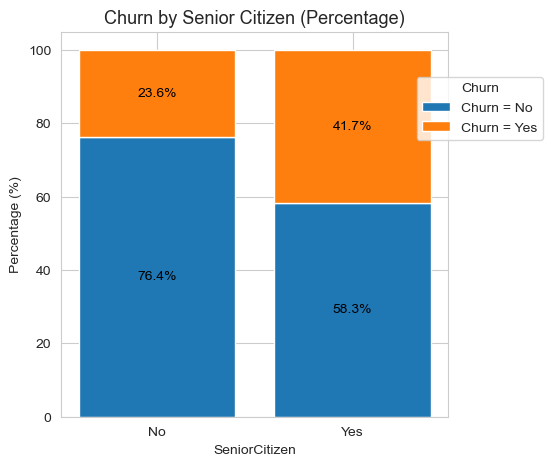

In [46]:
# Count values
counts = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')

# Calculate percentage per SeniorCitizen
counts['percent'] = counts.groupby('SeniorCitizen')['count'].transform(lambda x: x / x.sum() * 100)

# Pivot for stacked plotting
pivot = counts.pivot(index='SeniorCitizen', columns='Churn', values='percent').fillna(0)

# Plot style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(5,5))

# Plot stacked bar manually
bottom = None
for churn_value in pivot.columns:
    ax.bar(
        pivot.index,
        pivot[churn_value],
        label=f"Churn = {churn_value}",
        bottom=bottom
    )
    bottom = pivot[churn_value] if bottom is None else bottom + pivot[churn_value]

# Add percentage labels inside bars
for i, senior in enumerate(pivot.index):
    cumulative = 0
    for churn_value in pivot.columns:
        value = pivot.loc[senior, churn_value]
        if value > 0:
            ax.text(
                i, cumulative + value/2,
                f"{value:.1f}%",
                ha="center", va="center", color="black", fontsize=10
            )
        cumulative += value

# Set axis labels
ax.set_title("Churn by Senior Citizen (Percentage)", fontsize=13)
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("SeniorCitizen")

# Replace 0/1 with No/Yes
ax.set_xticks([0, 1])
ax.set_xticklabels(["No", "Yes"])

ax.legend(title="Churn", bbox_to_anchor = (0.9,0.9))#Customize legend Location 
plt.show()


#comparative a generated persentage of people in senior citizen catogery have churned.

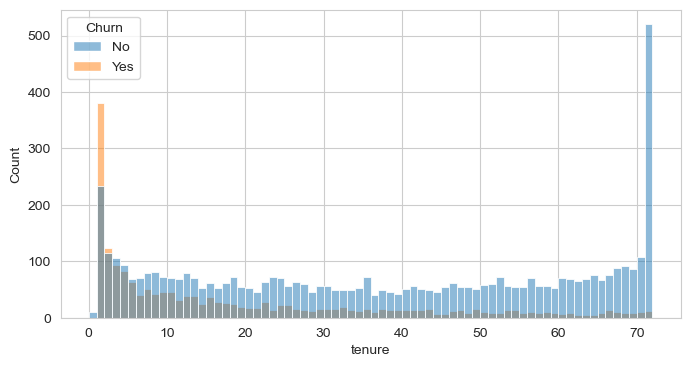

In [52]:
plt.figure(figsize = (8,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#People who have used our services for a long time have stayed  and people who have used our services 1 or 2 months have churned!

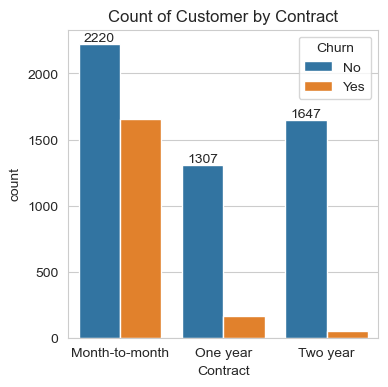

In [54]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract", fontsize = 12)
plt.show()

#People who have month to month contarct are likly to churn  then from who have 1 or 2 years of contract

In [57]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

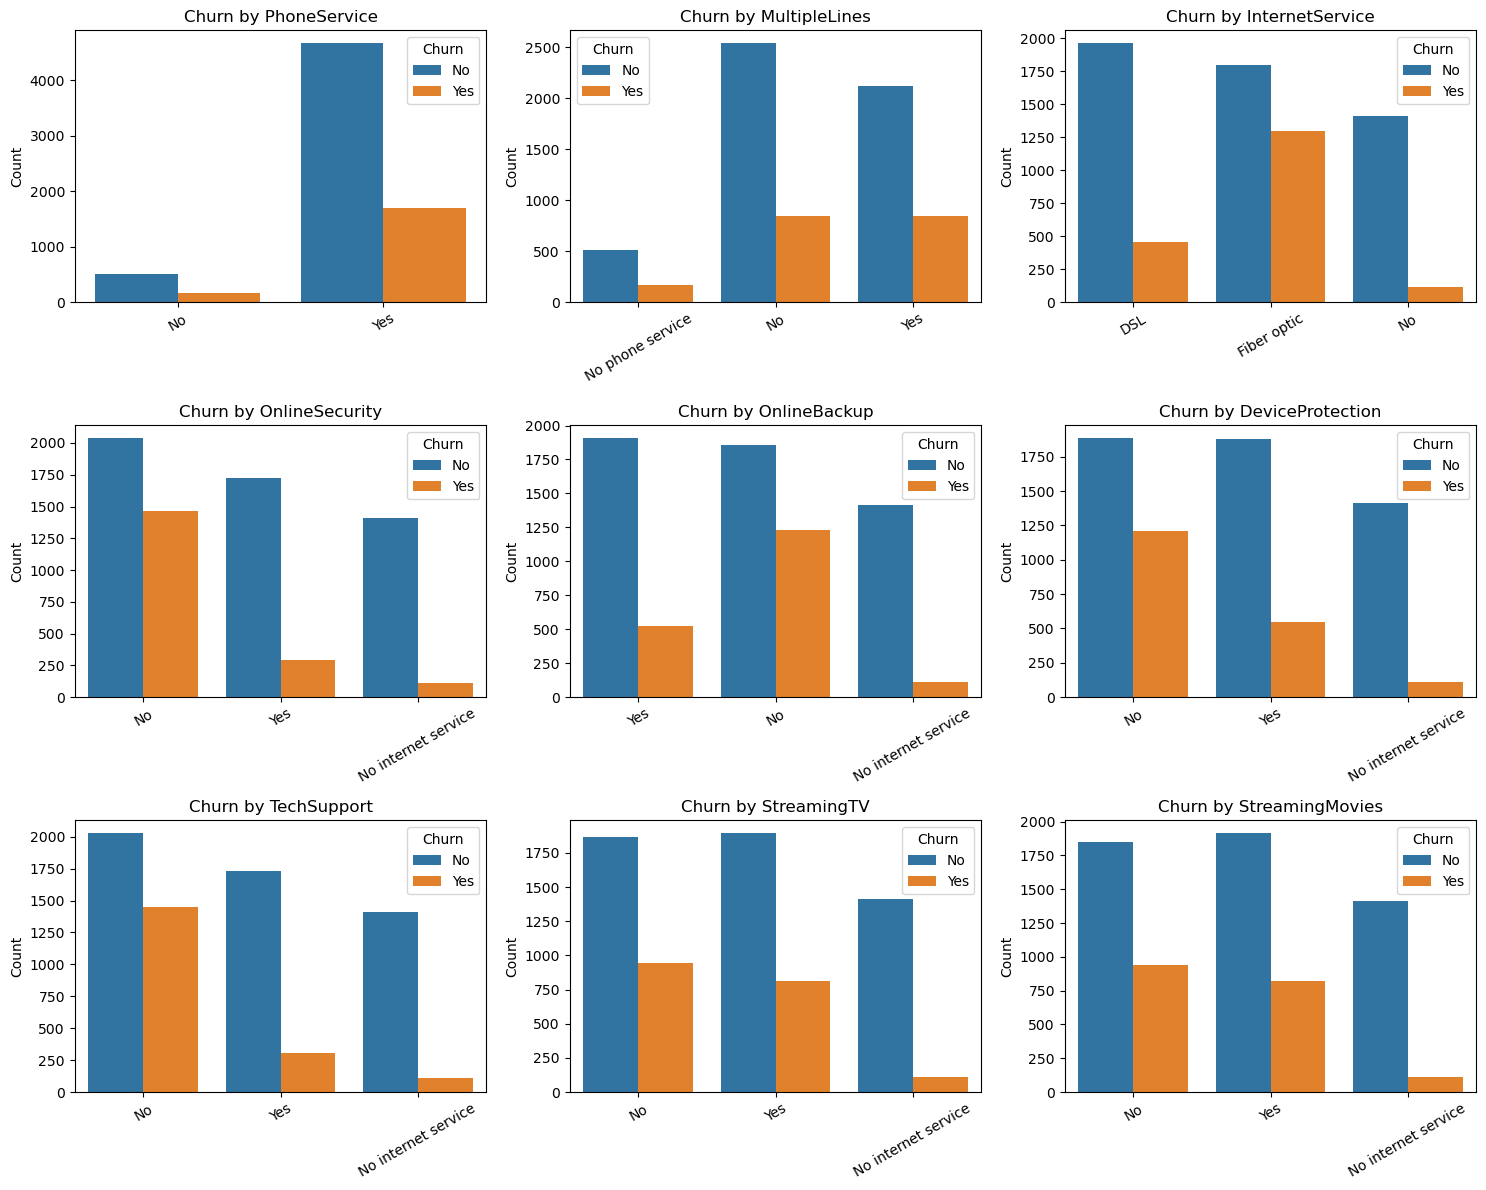

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Setup subplots grid (3x3 for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue="Churn", ax=axes[i])
    axes[i].set_title(f"Churn by {col}", fontsize = 12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=30)

# Remove empty subplot (if any extra)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Most customers have PhoneService and InternetService, with churn being higher among those using Fiber optic. Services like OnlineSecurity, TechSupport, and OnlineBackup show a clear pattern where customers without these add-ons churn more. Streaming services (TV, Movies) don’t strongly influence churn, as churn rates look fairly balanced across Yes/No.


#Overall: Lack of support/security services is linked with higher churn, while basic phone/internet service alone doesn’t prevent churn.

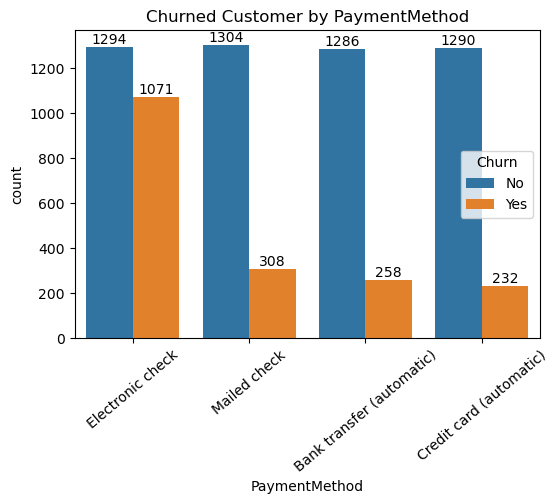

In [13]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by PaymentMethod", fontsize = 12)
plt.xticks(rotation = 40)
plt.show()

#Customer is likely to churn when he/she is using electronic check as payment method.

Customer Churn Analysis Summary

This project analyzes telecom customer data to identify factors influencing churn.
Churn Rate: Approximately 26% of customers left the company.
Customers with shorter tenure (less than 12 months) showed the highest churn, indicating early dissatisfaction. Month-to-month contracts had the greatest churn risk compared to long-term contracts.
Customers with higher monthly charges were more likely to leave, suggesting pricing sensitivity. Lack of Online Security and Tech Support services strongly correlated with higher churn, emphasizing the importance of customer service quality.
Those using electronic check payments also had higher churn, possibly due to payment inconvenience.

Overall, improving customer support, promoting long-term contracts, and offering value-based pricing can significantly reduce churn and improve retention.